<h3>3 conv 64 filters 1 dense with 64 nodes</h3>
<h3>Accuracy: 95.5%</h3>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !unzip "/content/drive/MyDrive/Potato-20220304T040717Z-001.zip" -d "/content"
!unrar x "/content/drive/MyDrive/Potato.rar" "/content/Potato/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Potato.rar

Creating    /content/Potato                                           OK
Creating    /content/Potato/augmented_healthy                         OK
Extracting  /content/Potato/augmented_healthy/aug_healthy_0_2487.png       0%  OK 
Extracting  /content/Potato/augmented_healthy/aug_healthy_0_3176.png       0%  OK 
Extracting  /content/Potato/augmented_healthy/aug_healthy_0_3983.png       0%  OK 
Extracting  /content/Potato/augmented_healthy/aug_healthy_0_8639.png       0%  OK 
Extracting  /content/Potato/augmented_healthy/aug_healthy_0_8740.png       0%  OK 
Extracting  /content/Potato/augmented_healthy/aug_healthy_0_8914.png       0%  OK 
Extracting  /content/Potato/augmented_healthy/aug_healthy_100_2093.png       0%  OK 
Extracting  /content/Potato/augmented_healthy/aug_healthy_100_6432.png       0%

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random

(256, 256, 3)


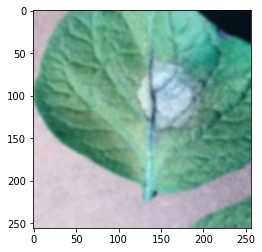

In [4]:
data_path = '/content/Potato/'
# valid_path = '/content/drive/MyDrive/Potato/Validation'
categories = os.listdir(data_path)
for category in categories:
  path = os.path.join(data_path, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    new_array = cv2.resize(img_array, (256, 256))
    print(np.array(new_array).shape)
    plt.imshow(new_array, cmap='gray')
    break
  break

In [5]:
IMG_SIZE = 128

training_set = []

for category in categories:
  path = os.path.join(data_path, category)
  index = categories.index(category)
  for img in tqdm(os.listdir(path)):
    try:
      img_array = cv2.imread(os.path.join(path, img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_set.append([new_array, index])
    except Exception as e:
        pass


100%|██████████| 1560/1560 [00:01<00:00, 1216.40it/s]


In [6]:
random.shuffle(training_set)

In [7]:
x_train = []
y_train = []

for img_array, label in training_set:
  x_train.append(img_array)
  y_train.append(label)

In [8]:
np.array(x_train).shape

(4682, 128, 128, 3)

In [9]:
X_train =  np.array(x_train).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

In [10]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
#                                                     test_size = 0.2,
#                                                     random_state = 1)

In [11]:
# X_test =  np.array(X_test).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
# y_test = np.array(y_test)

In [12]:
X_train = X_train/255.0

In [13]:
X_train.shape

(4682, 128, 128, 3)

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import TensorBoard
import time
%load_ext tensorboard


In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [17]:
dense_layers = [1,2,3]
layer_sizes = [32,64,128]
conv_layers = [2,3,4]


for dense_layer in dense_layers:
  for layer_size in layer_sizes:
    for conv_layer in conv_layers:
      NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
      tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

      print(NAME)

      #model initialzation
      model = Sequential()

      #model definition
      model.add(Conv2D(layer_size, (3,3), input_shape = X_train.shape[1:], padding='SAME'))
      model.add(Activation('relu'))  
      model.add(MaxPooling2D(pool_size=(2,2)))

      for l in range(conv_layer-1):
        model.add(Conv2D(layer_size, (3,3), padding='SAME'))
        model.add(Activation('relu')) 
        model.add(MaxPooling2D(pool_size=(2,2)))

      model.add(Flatten())

      for l in range(dense_layer):
        model.add(Dense(layer_size))
        model.add(Activation('relu')) 


      #final output layer
      model.add(Dense(3))
      model.add(Activation('softmax'))

      #settings
      model.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
      #fit
      model.fit(X_train, y_train, batch_size=16, epochs=20, validation_split=0.2, callbacks=[tensorboard])
      # model.fit(X, y, batch_size=8, epochs=25, validation_split=0.2)


3-conv-64-nodes-1-dense-1661946072
Epoch 1/20
235/235 [==============================] - 16s 19ms/step - loss: 0.6868 - accuracy: 0.6526 - val_loss: 0.6109 - val_accuracy: 0.7652
Epoch 2/20
235/235 [==============================] - 4s 17ms/step - loss: 0.2616 - accuracy: 0.8945 - val_loss: 0.1820 - val_accuracy: 0.9370
Epoch 3/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1614 - accuracy: 0.9389 - val_loss: 0.1277 - val_accuracy: 0.9520
Epoch 4/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1426 - accuracy: 0.9450 - val_loss: 0.2331 - val_accuracy: 0.9200
Epoch 5/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1347 - accuracy: 0.9495 - val_loss: 0.1066 - val_accuracy: 0.9616
Epoch 6/20
235/235 [==============================] - 4s 17ms/step - loss: 0.0787 - accuracy: 0.9733 - val_loss: 0.1174 - val_accuracy: 0.9605
Epoch 7/20
235/235 [==============================] - 4s 17ms/step - loss: 0.0746 - accuracy: 0.9722 - val

In [ ]:
model.save('3-conv-1-dense-64-nodes-95-per-cent-potato-augmented.h5')  # creates a HDF5 file 'my_model.h5'